## **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# For reproducibility
torch.manual_seed(1)

## **Data**

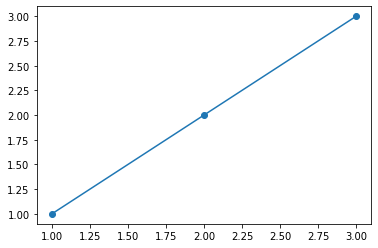

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

## **Cost by W, b**

In [18]:
W_l = np.linspace(-5, 7, 1000)
b_l = np.random.rand(1000)-0.5
print(b_l[:4])
cost_l = []
for W in W_l:
    hypothesis = W * x_train + b_l
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item())

[ 0.15708672 -0.14180251  0.19817337  0.44739913]


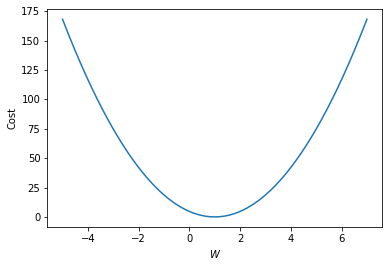

In [19]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## **Gradient Descent by Hand**

In [34]:
W = 0
b = 0
gradient_w = torch.sum((W * x_train + b - y_train) * x_train)
gradient_b = torch.sum(W * x_train + b - y_train)
print(gradient_w)
print(gradient_b)

tensor(-14.)
tensor(-6.)


In [35]:
lr = 0.1
W = W - lr * gradient_w
b = b - lr * gradient_b
print(W)
print(b)

tensor(1.4000)
tensor(0.6000)


Training

In [44]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
b = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient_W = torch.sum((W * x_train + b - y_train) * x_train)
    gradient_b = torch.sum(W * x_train + b - y_train)

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient_W
    b -= lr * gradient_b

Epoch    0/100 W: 0.000, b: 0.000, Cost: 4.666667
Epoch   10/100 W: 0.874, b: 0.249, Cost: 0.010637
Epoch   20/100 W: 0.922, b: 0.177, Cost: 0.004486
Epoch   30/100 W: 0.946, b: 0.122, Cost: 0.002152
Epoch   40/100 W: 0.963, b: 0.085, Cost: 0.001032
Epoch   50/100 W: 0.974, b: 0.059, Cost: 0.000495
Epoch   60/100 W: 0.982, b: 0.041, Cost: 0.000238
Epoch   70/100 W: 0.988, b: 0.028, Cost: 0.000114
Epoch   80/100 W: 0.991, b: 0.020, Cost: 0.000055
Epoch   90/100 W: 0.994, b: 0.014, Cost: 0.000026
Epoch  100/100 W: 0.996, b: 0.009, Cost: 0.000013


## **Training with Optim**

In [45]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/100 W: 0.000, b: 0.000, Cost: 4.666667
Epoch   10/100 W: 0.873, b: 0.289, Cost: 0.011979
Epoch   20/100 W: 0.900, b: 0.227, Cost: 0.007363
Epoch   30/100 W: 0.922, b: 0.178, Cost: 0.004526
Epoch   40/100 W: 0.939, b: 0.139, Cost: 0.002782
Epoch   50/100 W: 0.952, b: 0.109, Cost: 0.001710
Epoch   60/100 W: 0.962, b: 0.086, Cost: 0.001051
Epoch   70/100 W: 0.970, b: 0.067, Cost: 0.000646
Epoch   80/100 W: 0.977, b: 0.053, Cost: 0.000397
Epoch   90/100 W: 0.982, b: 0.041, Cost: 0.000244
Epoch  100/100 W: 0.986, b: 0.032, Cost: 0.000150
